In [1]:
import numpy as np
import pandas as pd

In [2]:
Flow = pd.read_excel('August_Flow.xlsx') 
Flow.head()

,date,Monitor ID,NO2 (ppb),NO2 (Plume AQI),VOC (ppb),VOC (Plume AQI),pm 1 (ug/m3),pm 1 (Plume AQI),pm 10 (ug/m3),pm 10 (Plume AQI),pm25 (ug/m3),pm 25 (Plume AQI),latitude,longitude
0,2021-08-16 01:01:26,14590,0,0,94,8,59,32,130,132,87,137,NaN,NaN
1,2021-08-16 01:02:26,14590,0,0,85,7,55,29,121,126,83,133,NaN,NaN
2,2021-08-16 01:03:26,14590,0,0,82,7,56,30,125,128,84,134,NaN,NaN
3,2021-08-16 01:04:26,14590,0,0,78,6,64,36,132,133,90,140,NaN,NaN
4,2021-08-16 01:05:26,14590,0,0,77,6,54,29,124,128,82,132,NaN,NaN


In [3]:
(unique, counts) = np.unique(Flow['Monitor ID'], return_counts=True)
frequencies = np.asarray((unique, counts)).T

print(frequencies)

[[12396 24076]
 [13227  3149]
 [14128  8657]
 [14529  4925]
 [14590  4865]]


Seems like there are 5 different monitors out in the field.

(array([1369., 3435., 5764., 9805., 8849., 2860., 4765., 2960., 2048.,
        3817.]),
 array([18849.5158912 , 18851.58095255, 18853.64601389, 18855.71107523,
        18857.77613657, 18859.84119792, 18861.90625926, 18863.9713206 ,
        18866.03638194, 18868.10144329, 18870.16650463]),
 <BarContainer object of 10 artists>)

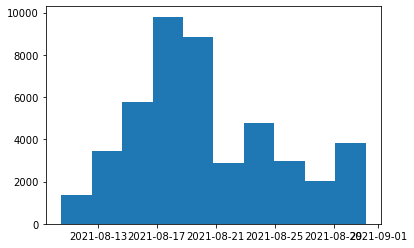

In [4]:
import matplotlib.pyplot as plt

ax = plt.gca()
ax.hist(Flow['date'])


The data is collected over a course of about 20 days. The monitor takes air quality measurements every minute.
Next, trying to see how frequently each monitor was used:

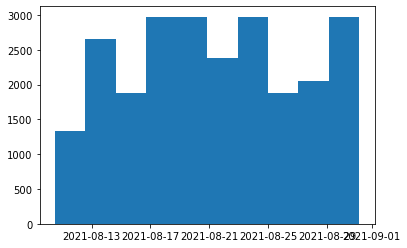

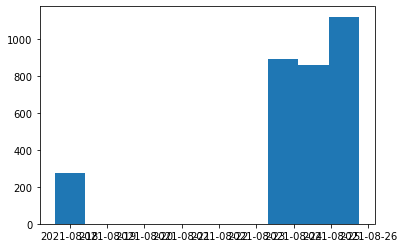

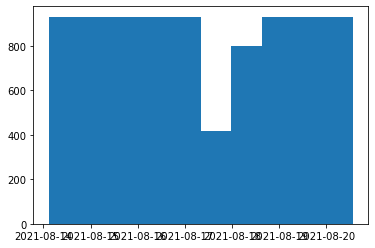

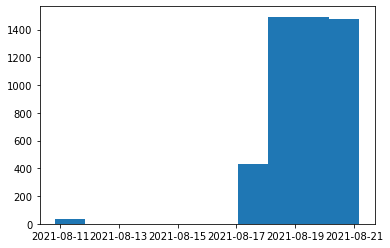

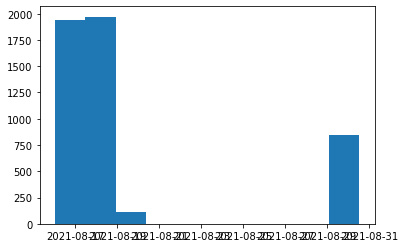

In [5]:
for x in range(5):
    plt.figure()
    ax = plt.gca()
    ax.hist(Flow.loc[Flow['Monitor ID'] == unique[x]]['date'])

Now let's see the geographical distribution and see if any particular monitor is responsible for vast majority of missing latitude and longitude. 

In [6]:
np.unique(Flow.loc[~np.isnan(Flow['latitude'])]['Monitor ID'], return_counts=True)


(array([12396]), array([20309]))

Only Monitor 12396 collected geogrpahical data and not always. 24076 - 20309 measures from this monitor is missing spatial coordinates

In [7]:
print(max(Flow.loc[~np.isnan(Flow['latitude'])]['latitude']))
print(min(Flow.loc[~np.isnan(Flow['latitude'])]['latitude']))

print(max(Flow.loc[~np.isnan(Flow['latitude'])]['longitude']))
print(min(Flow.loc[~np.isnan(Flow['latitude'])]['longitude']))


42.384018
42.30135
-83.1055459999999
-83.198265
